In [19]:
import pandas as pd
import pandas as pd
import plotly.express as px

df = pd.read_csv('../migration.csv')
print(df.shape)
df.head()

(160781, 11)


,Country Origin Name,Country Origin Code,Migration by Gender Name,Migration by Gender Code,Country Dest Name,Country Dest Code,1960 [1960],1970 [1970],1980 [1980],1990 [1990],2000 [2000]
0,Afghanistan,AFG,Total,TOT,Afghanistan,AFG,0,0,0,0,0
1,Afghanistan,AFG,Total,TOT,Albania,ALB,0,0,0,0,0
2,Afghanistan,AFG,Total,TOT,Algeria,DZA,41,16,13,10,8
3,Afghanistan,AFG,Total,TOT,American Samoa,ASM,0,0,0,0,0
4,Afghanistan,AFG,Total,TOT,Andorra,AND,0,0,2,5,6


# data preprocess

In [22]:
df[df['Country Origin Name'] == 'Refugees'].head()

,Country Origin Name,Country Origin Code,Migration by Gender Name,Migration by Gender Code,Country Dest Name,Country Dest Code,1960 [1960],1970 [1970],1980 [1980],1990 [1990],2000 [2000]
116424,Refugees,zzz,Total,TOT,Afghanistan,AFG,..,..,..,..,..
116425,Refugees,zzz,Total,TOT,Albania,ALB,..,..,..,..,..
116426,Refugees,zzz,Total,TOT,Algeria,DZA,..,..,..,..,..
116427,Refugees,zzz,Total,TOT,American Samoa,ASM,..,..,..,..,..
116428,Refugees,zzz,Total,TOT,Andorra,AND,..,..,..,..,..


In [23]:
df.rename(columns=lambda x: x.split(' ')[0] if x.endswith(']') else x, inplace=True)
df = df[~df.isna().any(axis = 1)]
df.shape
df[['1960', '1970', '1980', '1990', '2000']] = df[['1960', '1970', '1980', '1990', '2000']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

## Visualize basic

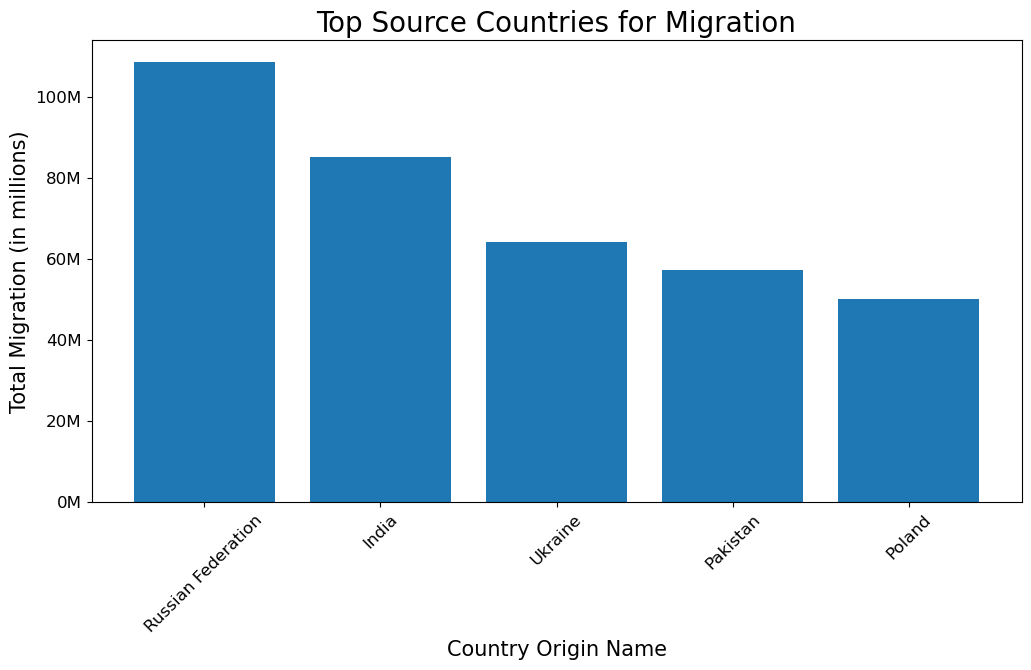

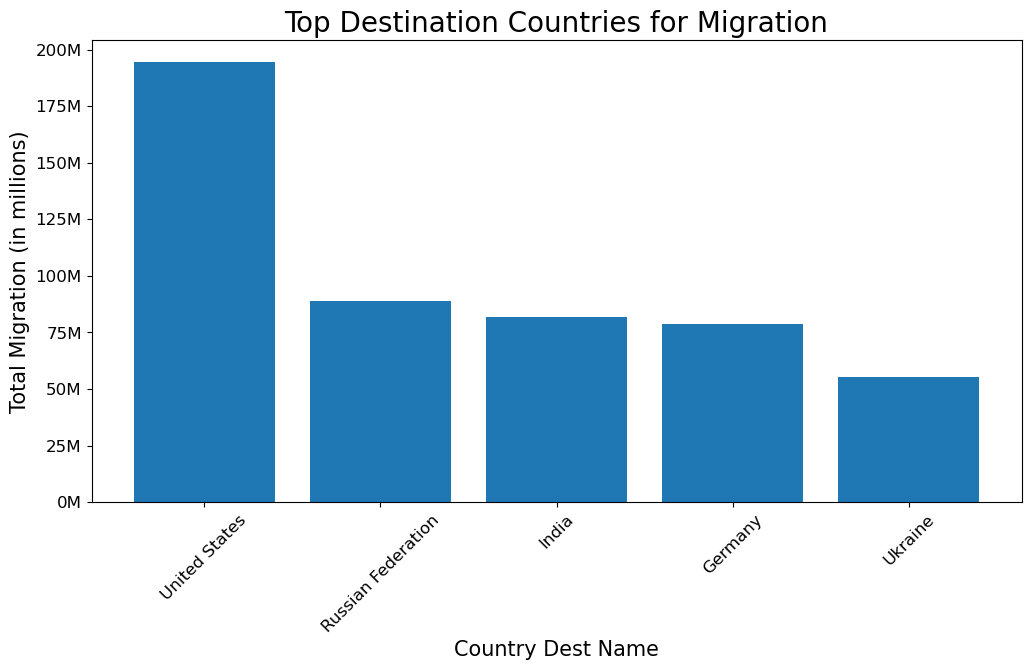

In [30]:
source_migration = df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
source_migration = source_migration.sort_values(by='Total Migration', ascending=False).head(5)

plt.figure(figsize=(12, 6))
plt.bar(source_migration['Country Origin Name'], source_migration['Total Migration'])
plt.title('Top Source Countries for Migration', fontsize=20)
plt.xlabel('Country Origin Name', fontsize=15)
plt.ylabel('Total Migration (in millions)', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.show()

# 2. Primary destination countries for migration
dest_migration = df.groupby('Country Dest Name')['Total Migration'].sum().reset_index()
dest_migration = dest_migration.sort_values(by='Total Migration', ascending=False).head(5)

plt.figure(figsize=(12, 6))
plt.bar(dest_migration['Country Dest Name'], dest_migration['Total Migration'])
plt.title('Top Destination Countries for Migration', fontsize=20)
plt.xlabel('Country Dest Name', fontsize=15)
plt.ylabel('Total Migration (in millions)', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Total Migration'] = df[['1960', '1970', '1980', '1990', '2000']].sum(axis=1)
source_migration = df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
source_migration = source_migration.sort_values(by='Total Migration', ascending=False).head(10)

/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


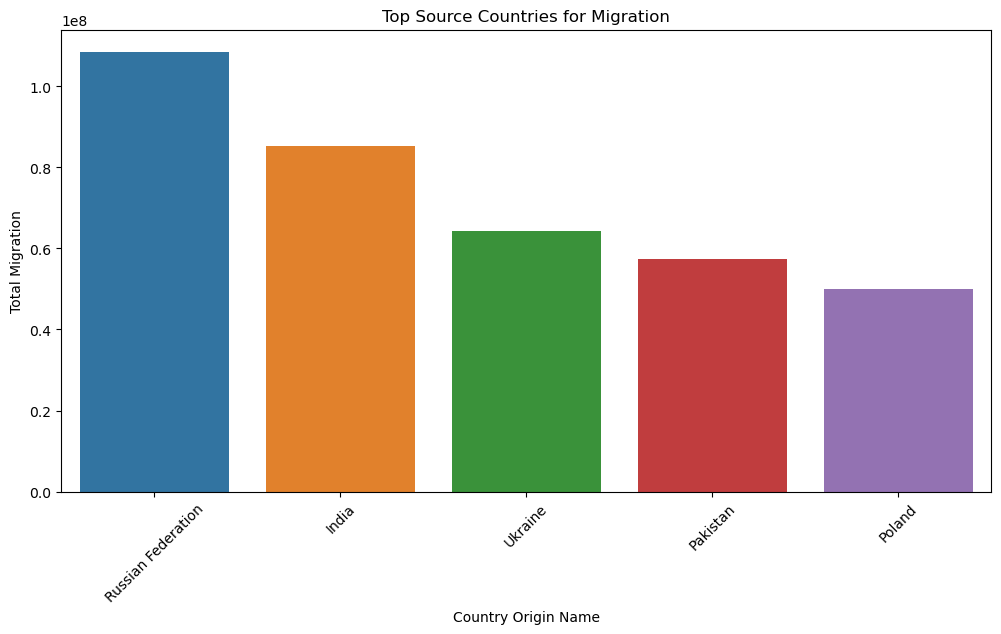

/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


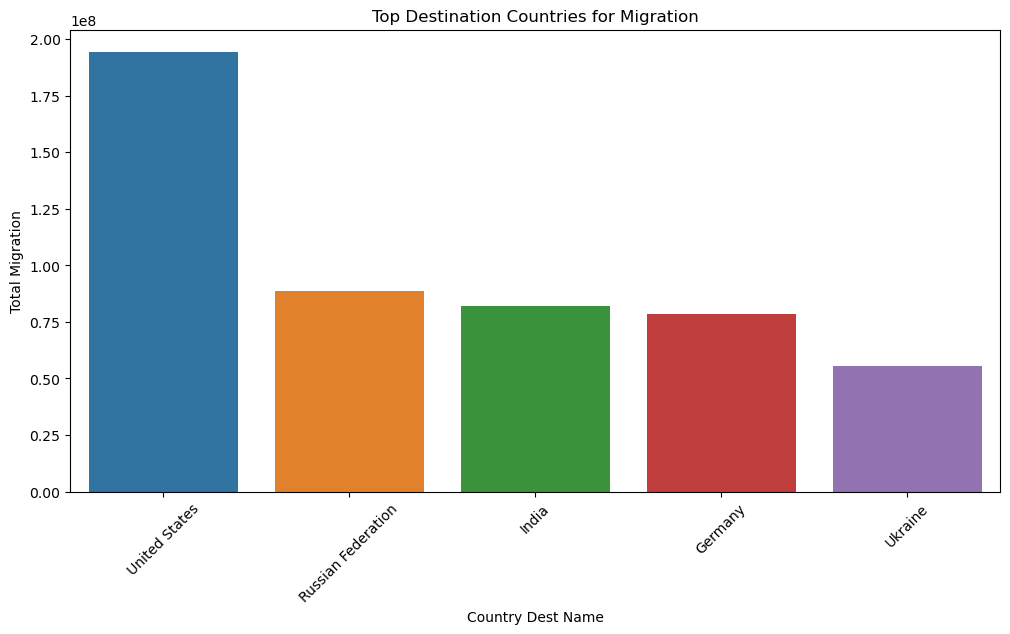

In [25]:
# 1. Primary source countries for migration
source_migration = df.groupby('Country Origin Name')['Total Migration'].sum().reset_index()
source_migration = source_migration.sort_values(by='Total Migration', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country Origin Name', y='Total Migration', data=source_migration)
plt.title('Top Source Countries for Migration')
plt.xticks(rotation=45)
plt.show()

# 2. Primary destination countries for migration
dest_migration = df.groupby('Country Dest Name')['Total Migration'].sum().reset_index()
dest_migration = dest_migration.sort_values(by='Total Migration', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country Dest Name', y='Total Migration', data=dest_migration)
plt.title('Top Destination Countries for Migration')
plt.xticks(rotation=45)
plt.show()

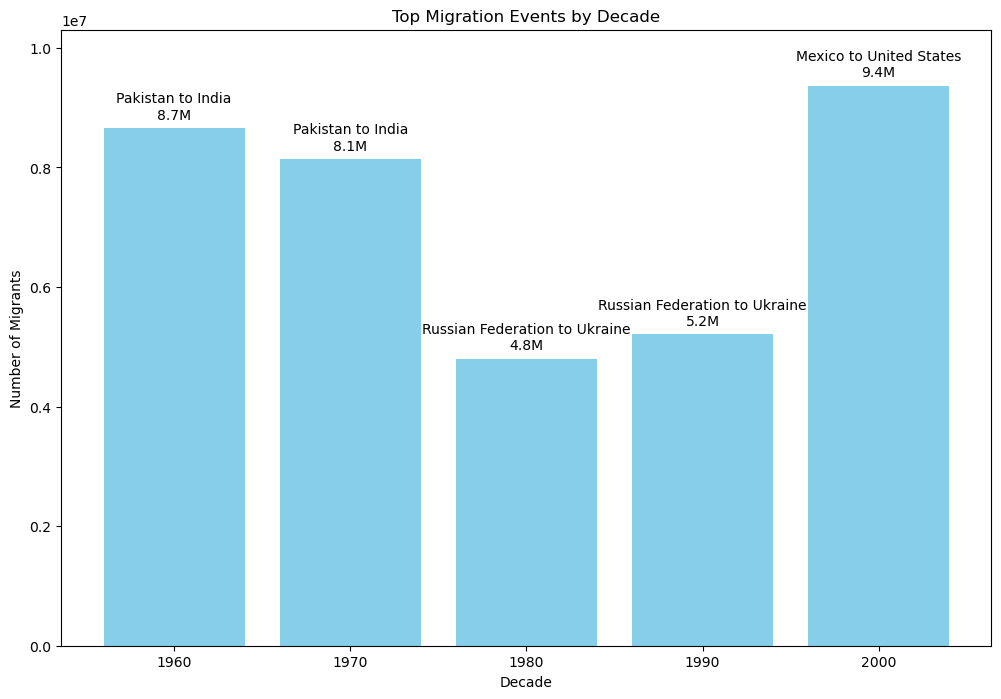

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Reshape the dataframe to a long format for plotting
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Get the top migration event for each decade
top_migrations = long_df.loc[long_df.groupby('Decade')['Migration'].idxmax()]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data
bars = ax.bar(top_migrations['Decade'], top_migrations['Migration'], color='skyblue')

# Adding annotations with formatted numbers in millions
for bar, migration, origin, dest in zip(bars, top_migrations['Migration'], top_migrations['Country Origin Name'], top_migrations['Country Dest Name']):
    yval = bar.get_height()
    formatted_migration = f'{migration / 1e6:.1f}M'
    ax.text(bar.get_x() + bar.get_width()/2, yval + 100000, f'{origin} to {dest}\n{formatted_migration}', ha='center', va='bottom', fontsize=10)

# Setting labels and title
ax.set_xlabel('Decade')
ax.set_ylabel('Number of Migrants')
ax.set_title('Top Migration Events by Decade')
ax.set_ylim(0, top_migrations['Migration'].max() * 1.1)

# Save the plot
plt.savefig('top_migration_events.png')

# Show the plot
plt.show()


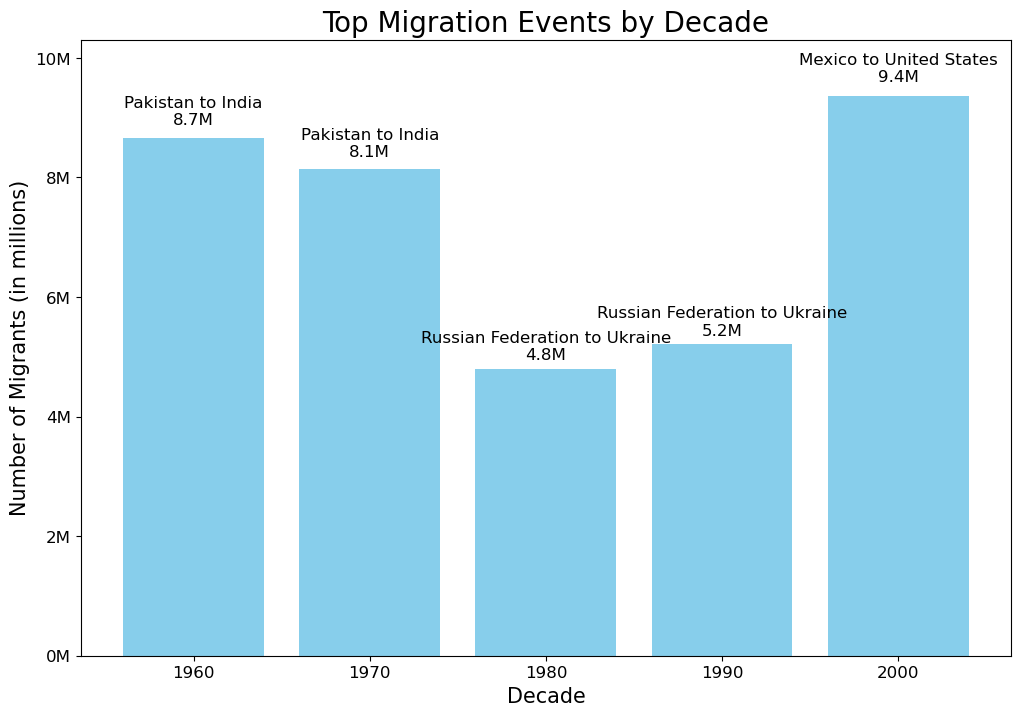

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Reshape the dataframe to a long format for plotting
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Get the top migration event for each decade
top_migrations = long_df.loc[long_df.groupby('Decade')['Migration'].idxmax()]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data
bars = ax.bar(top_migrations['Decade'], top_migrations['Migration'], color='skyblue')

# Adding annotations with formatted numbers in millions
for bar, migration, origin, dest in zip(bars, top_migrations['Migration'], top_migrations['Country Origin Name'], top_migrations['Country Dest Name']):
    yval = bar.get_height()
    formatted_migration = f'{migration / 1e6:.1f}M'
    ax.text(bar.get_x() + bar.get_width()/2, yval + yval * 0.02, f'{origin} to {dest}\n{formatted_migration}', ha='center', va='bottom', fontsize=12)

# Setting labels and title
ax.set_xlabel('Decade', fontsize=15)
ax.set_ylabel('Number of Migrants (in millions)', fontsize=15)
ax.set_title('Top Migration Events by Decade', fontsize=20)
ax.set_ylim(0, top_migrations['Migration'].max() * 1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

# Save the plot
plt.savefig('top_migration_events.png')

# Show the plot
plt.show()


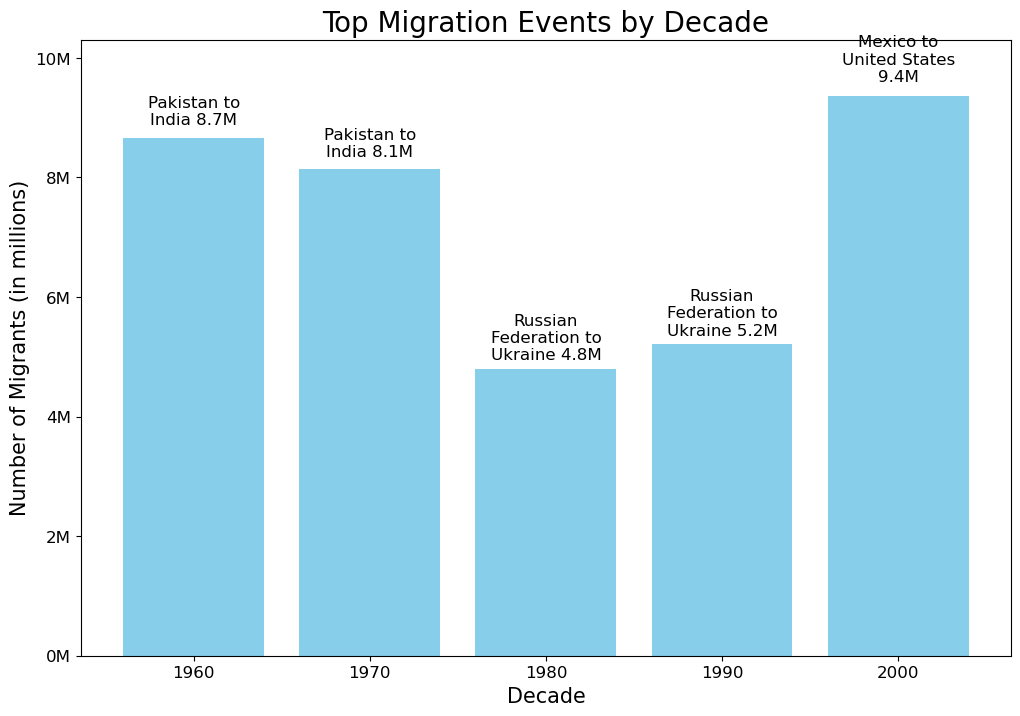

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Assuming df is already loaded

# Reshape the dataframe to a long format for plotting
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Get the top migration event for each decade
top_migrations = long_df.loc[long_df.groupby('Decade')['Migration'].idxmax()]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data
bars = ax.bar(top_migrations['Decade'], top_migrations['Migration'], color='skyblue')

# Adding annotations with formatted numbers in millions
for bar, migration, origin, dest in zip(bars, top_migrations['Migration'], top_migrations['Country Origin Name'], top_migrations['Country Dest Name']):
    yval = bar.get_height()
    formatted_migration = f'{migration / 1e6:.1f}M'
    text = f'{origin} to {dest}\n{formatted_migration}'
    wrapped_text = '\n'.join(textwrap.wrap(text, width=15))  # Adjust width as needed
    ax.text(bar.get_x() + bar.get_width()/2, yval + yval * 0.02, wrapped_text, ha='center', va='bottom', fontsize=12)

# Setting labels and title
ax.set_xlabel('Decade', fontsize=15)
ax.set_ylabel('Number of Migrants (in millions)', fontsize=15)
ax.set_title('Top Migration Events by Decade', fontsize=20)
ax.set_ylim(0, top_migrations['Migration'].max() * 1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

# Save the plot
plt.savefig('top_migration_events.png')

# Show the plot
plt.show()


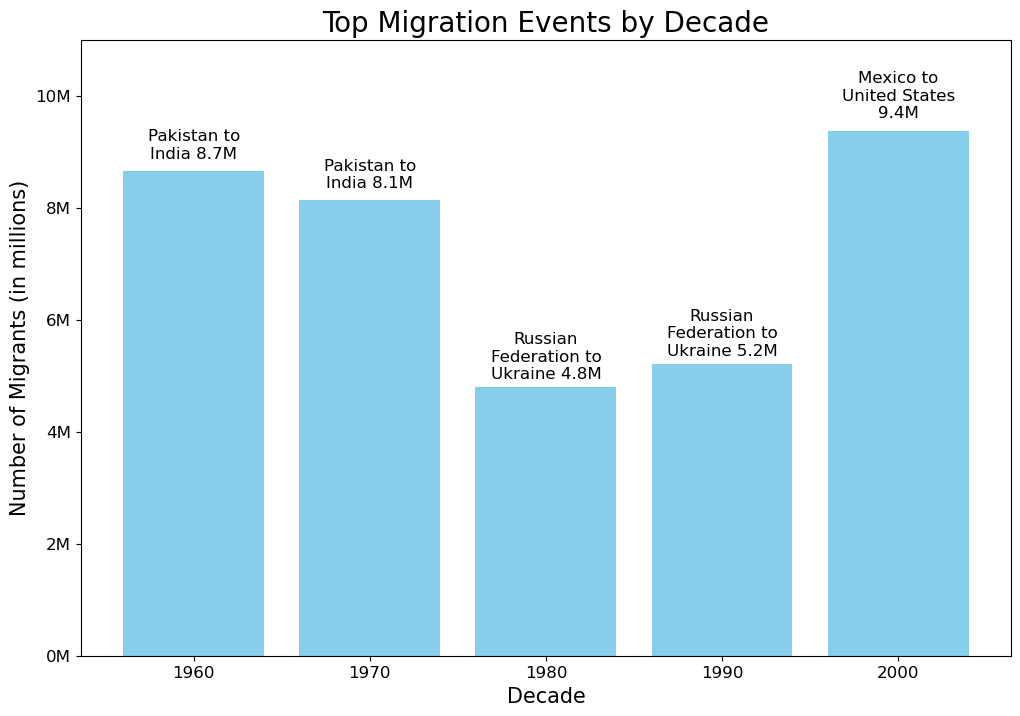

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Assuming df is already loaded

# Reshape the dataframe to a long format for plotting
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Get the top migration event for each decade
top_migrations = long_df.loc[long_df.groupby('Decade')['Migration'].idxmax()]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data
bars = ax.bar(top_migrations['Decade'], top_migrations['Migration'], color='skyblue')

# Adding annotations with formatted numbers in millions
for bar, migration, origin, dest in zip(bars, top_migrations['Migration'], top_migrations['Country Origin Name'], top_migrations['Country Dest Name']):
    yval = bar.get_height()
    formatted_migration = f'{migration / 1e6:.1f}M'
    text = f'{origin} to {dest}\n{formatted_migration}'
    wrapped_text = '\n'.join(textwrap.wrap(text, width=15))  # Adjust width as needed
    ax.text(bar.get_x() + bar.get_width()/2, yval + yval * 0.02, wrapped_text, ha='center', va='bottom', fontsize=12)

# Setting labels and title
ax.set_xlabel('Decade', fontsize=15)
ax.set_ylabel('Number of Migrants (in millions)', fontsize=15)
ax.set_title('Top Migration Events by Decade', fontsize=20)
ax.set_ylim(0, 11e6)  # Set the y-axis limit to 11 million
ax.tick_params(axis='both', which='major', labelsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

# Save the plot
plt.savefig('top_migration_events.png')

# Show the plot
plt.show()


In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named df and already loaded
# Select relevant columns and set multi-index with origin and destination
df_relevant = df[['Country Origin Name', 'Country Dest Name', '1960', '1970', '1980', '1990', '2000']]

# Pivot the DataFrame
pivot_df = df_relevant.set_index(['Country Origin Name', 'Country Dest Name'])

# Function to calculate fluctuation score based on direction changes
def calculate_fluctuation_score(migration_counts):
    trend = []
    score = 0
    for i in range(1, len(migration_counts)):
        if migration_counts[i] > migration_counts[i-1]:
            trend.append('up')
        elif migration_counts[i] < migration_counts[i-1]:
            trend.append('down')
        # Count direction changes
        if len(trend) > 1 and trend[-1] != trend[-2]:
            score += 1
    # Only return score if there is at least one up and one down trend
    if 'up' in trend and 'down' in trend:
        return score
    else:
        return 0

# Apply the function to calculate fluctuation scores
pivot_df['Fluctuation Score'] = pivot_df.apply(lambda row: calculate_fluctuation_score(row.dropna().values), axis=1)

# Calculate total migration for each origin-destination pair
pivot_df['Total Migration'] = pivot_df.sum(axis=1)

# Filter out rows with a fluctuation score of 0 (only consistent trends)
pivot_df = pivot_df[pivot_df['Fluctuation Score'] > 0]

# Normalize both Fluctuation Score and Total Migration
scaler = MinMaxScaler()
pivot_df[['Normalized Fluctuation Score', 'Normalized Total Migration']] = scaler.fit_transform(pivot_df[['Fluctuation Score', 'Total Migration']])

# Combine metrics into a single score (weighted sum)
weight_fluctuation = 0.5
weight_migration = 0.5
pivot_df['Combined Score'] = (weight_fluctuation * pivot_df['Normalized Fluctuation Score'] + 
                              weight_migration * pivot_df['Normalized Total Migration'])

# Reset the index to work with the DataFrame more easily
pivot_df_reset = pivot_df.reset_index()

# Select the single destination with the highest combined score for each origin
single_destinations = pivot_df_reset.loc[pivot_df_reset.groupby('Country Origin Name')['Combined Score'].idxmax()]

# Identify the top 5 most fluctuating and significant trends
top_5_fluctuating = single_destinations.nlargest(5, 'Combined Score')


print(top_5_fluctuating)


      Country Origin Name     Country Dest Name     1960     1970     1980  \
38272             Ukraine    Russian Federation  3500317  3486564  3811434   
29354              Poland               Germany  1112903  1107802  1219483   
6108               Canada         United States   995660   964010  1001367   
582               Algeria                France   201387   632298   630419   
22267    Macao SAR, China  Hong Kong SAR, China    13355  1625889     8553   

          1990     2000  Fluctuation Score  Total Migration  \
38272  4595811  3559975                  2         18954103   
29354   996274  1028120                  3          5464585   
6108    914902   950549                  3          4826491   
582     652025   535456                  3          2651588   
22267   144908    69229                  3          1861937   

       Normalized Fluctuation Score  Normalized Total Migration  \
38272                           0.5                    0.900671   
29354             

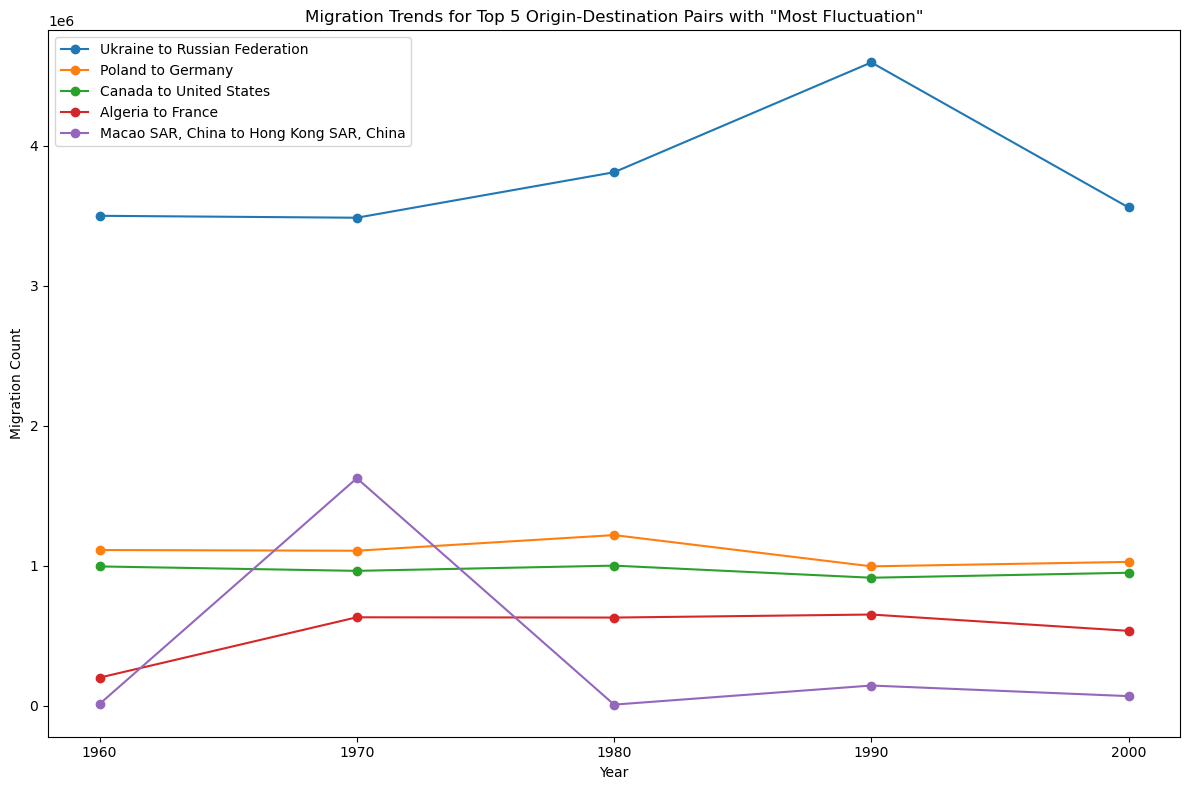

In [42]:
plt.figure(figsize=(12, 8))

for i in range(len(top_5_fluctuating)):
    row = top_5_fluctuating.iloc[i]
    origin = row['Country Origin Name']
    destination = row['Country Dest Name']
    years = ['1960', '1970', '1980', '1990', '2000']
    migration_counts = row[years].values
    plt.plot(years, migration_counts, marker='o', label=f'{origin} to {destination}')

plt.title('Migration Trends for Top 5 Origin-Destination Pairs with "Most Fluctuation"')
plt.xlabel('Year')
plt.ylabel('Migration Count')
plt.legend()
plt.tight_layout()
plt.savefig('top_fluctuating_migrations.png')
plt.show()

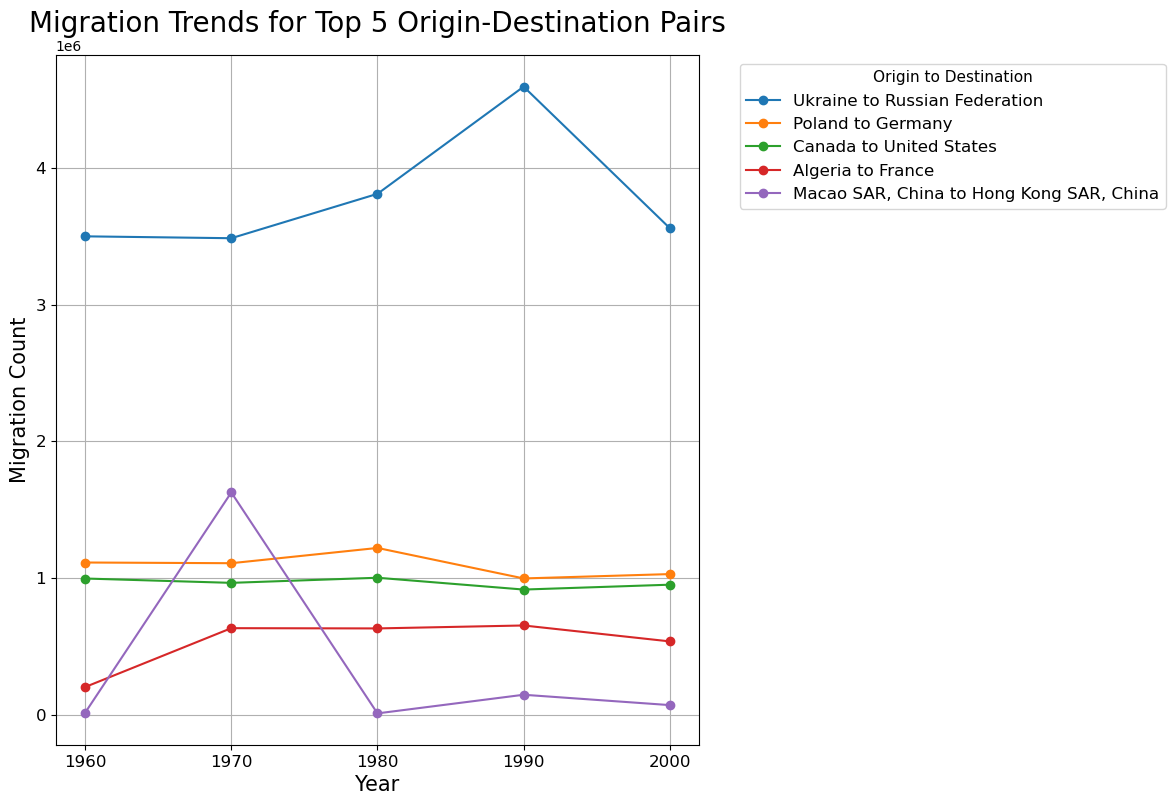

In [39]:
plt.figure(figsize=(12, 8))

for i in range(len(top_5_fluctuating)):
    row = top_5_fluctuating.iloc[i]
    origin = row['Country Origin Name']
    destination = row['Country Dest Name']
    years = ['1960', '1970', '1980', '1990', '2000']
    migration_counts = row[years].values
    plt.plot(years, migration_counts, marker='o', label=f'{origin} to {destination}')

plt.title('Migration Trends for Top 5 Origin-Destination Pairs', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Migration Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, title='Origin to Destination', title_fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('top_fluctuating_migrations.png')
plt.show()

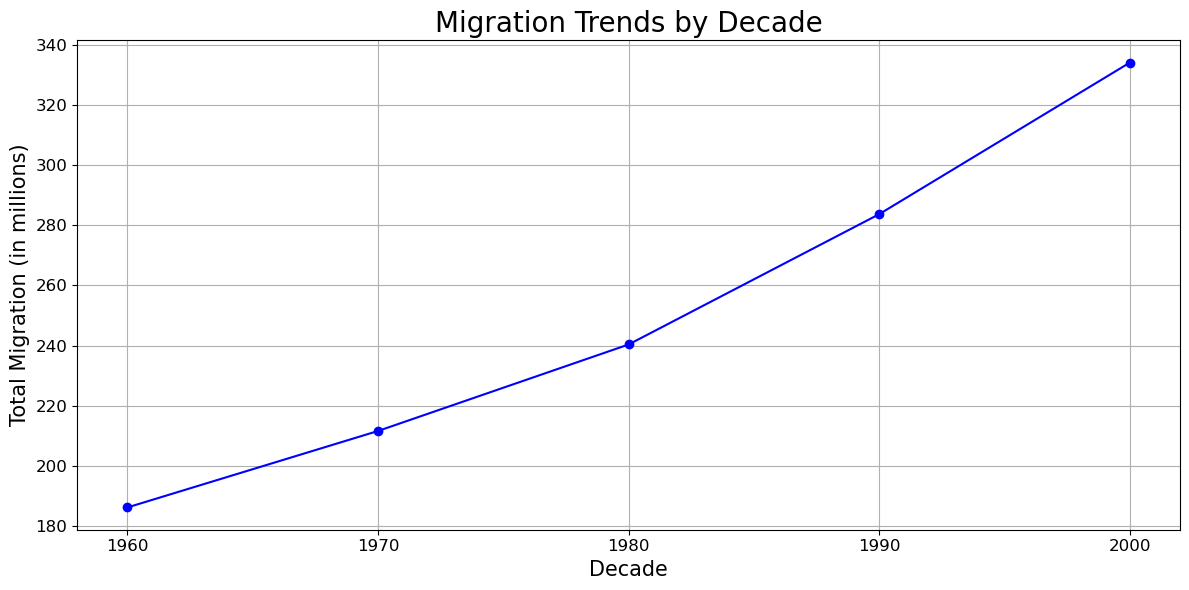

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Sum the migration data for each decade
decade_migration = df[['1960', '1970', '1980', '1990', '2000']].sum().reset_index()
decade_migration.columns = ['Decade', 'Total Migration']

# Convert the 'Total Migration' to millions
decade_migration['Total Migration'] = decade_migration['Total Migration'] / 1e6

plt.figure(figsize=(12, 6))
plt.plot(decade_migration['Decade'], decade_migration['Total Migration'], marker='o', linestyle='-', color='b')
plt.title('Migration Trends by Decade', fontsize=20)
plt.xlabel('Decade', fontsize=15)
plt.ylabel('Total Migration (in millions)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('migration_trends_by_decade.png')
plt.show()


/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

TypeError: 'NoneType' object is not iterable

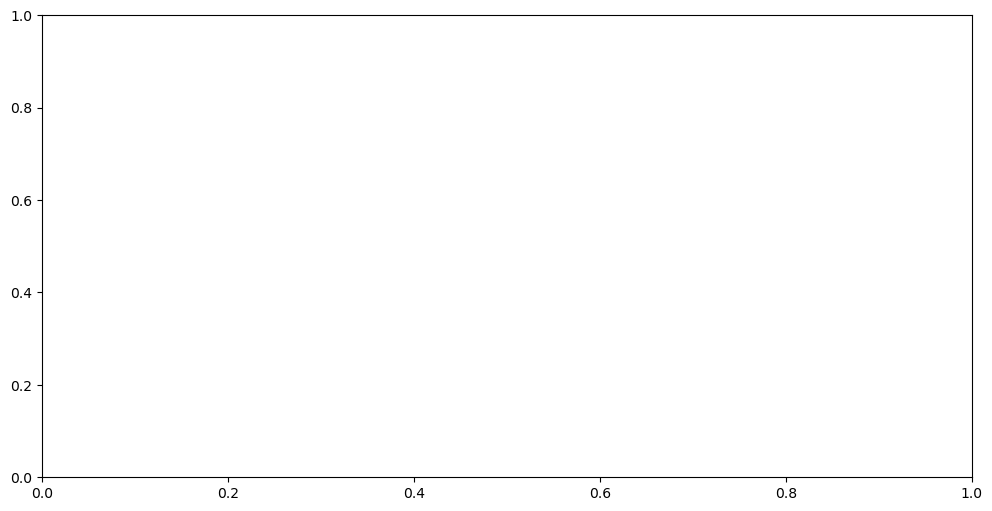

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact

grouped_df = df.groupby('Migration by Gender Name').sum().T

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, markers=True)
plt.title('Migration Trends by Decade for Male and Female')
plt.xlabel('Decade')
plt.ylabel('Total Migration')
plt.legend(title='Gender')
plt.show()

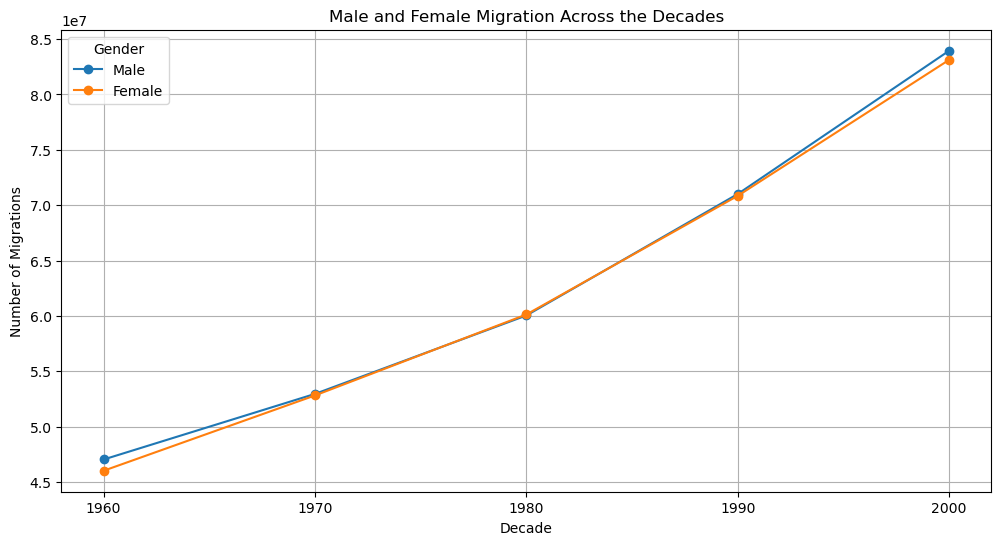

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


# Reshape the dataframe to a long format for plotting and analysis
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name', 'Migration by Gender Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Aggregate migration data by decade and gender
migration_by_decade_gender = long_df.groupby(['Decade', 'Migration by Gender Name'])['Migration'].sum().reset_index()

# Create a line plot for male and female migration across the decades
plt.figure(figsize=(12, 6))
for gender in ['Male', 'Female']:
    gender_data = migration_by_decade_gender[migration_by_decade_gender['Migration by Gender Name'] == gender]
    plt.plot(gender_data['Decade'], gender_data['Migration'], marker='o', label=gender)

plt.xlabel('Decade')
plt.ylabel('Number of Migrations')
plt.title('Male and Female Migration Across the Decades')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


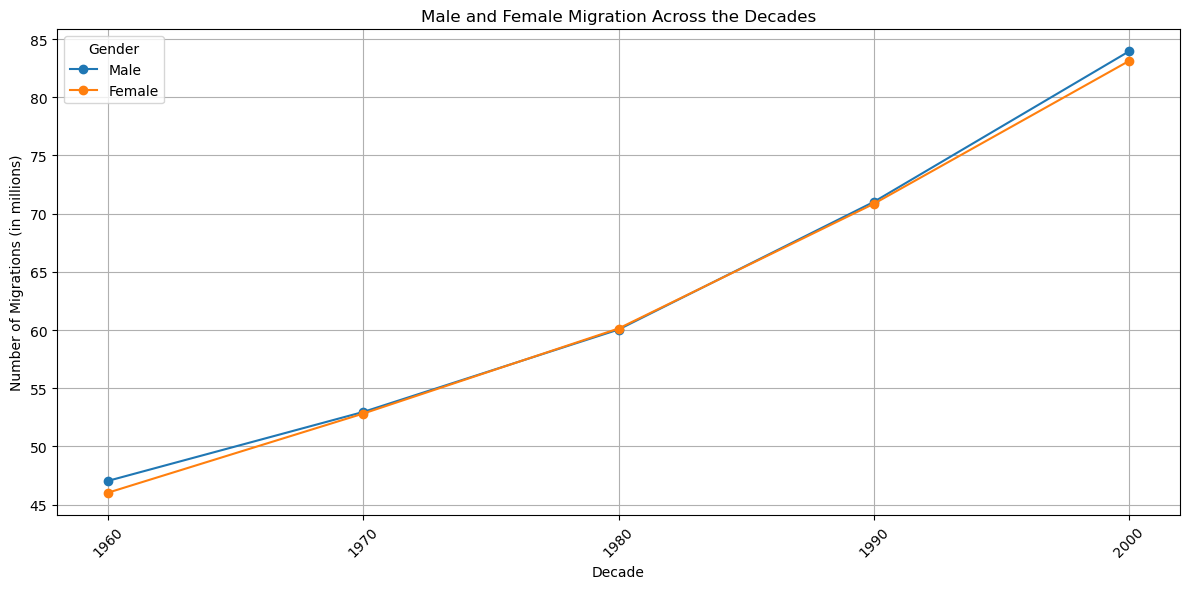

In [50]:
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name', 'Migration by Gender Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Aggregate migration data by decade and gender
migration_by_decade_gender = long_df.groupby(['Decade', 'Migration by Gender Name'])['Migration'].sum().reset_index()

# Create a line plot for male and female migration across the decades with y-axis in millions
plt.figure(figsize=(12, 6))
for gender in ['Male', 'Female']:
    gender_data = migration_by_decade_gender[migration_by_decade_gender['Migration by Gender Name'] == gender]
    plt.plot(gender_data['Decade'], gender_data['Migration'] / 1e6, marker='o', label=gender)

plt.xlabel('Decade')
plt.ylabel('Number of Migrations (in millions)')
plt.title('Male and Female Migration Across the Decades')
plt.legend(title='Gender')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

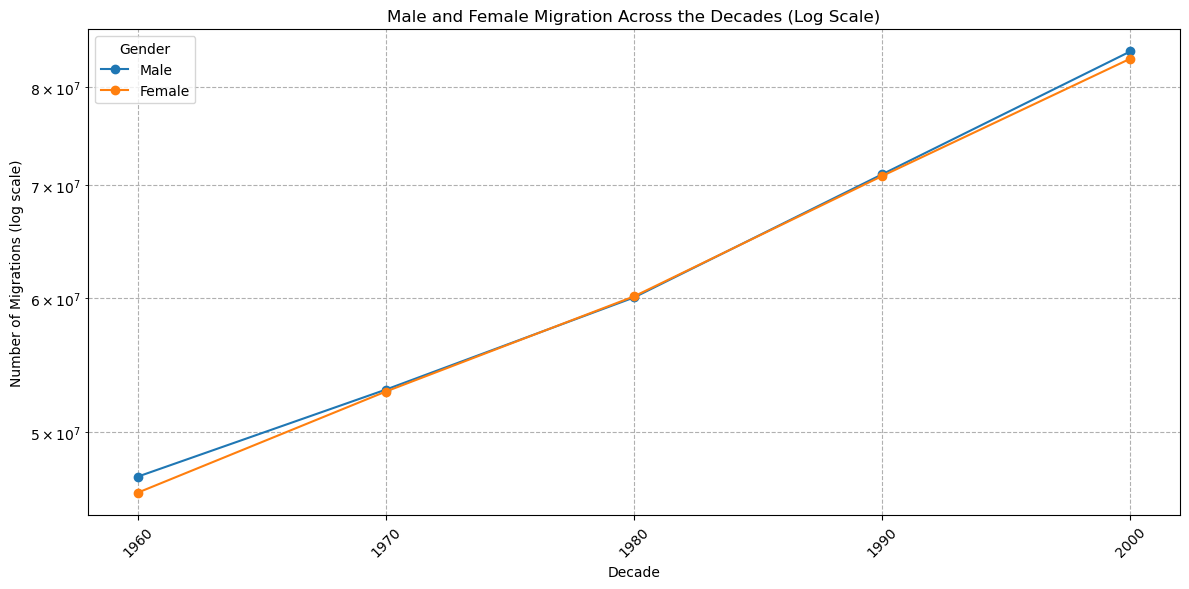

In [51]:
migration_by_decade_gender = long_df.groupby(['Decade', 'Migration by Gender Name'])['Migration'].sum().reset_index()

# Create a line plot for male and female migration across the decades with y-axis in log-scale
plt.figure(figsize=(12, 6))
for gender in ['Male', 'Female']:
    gender_data = migration_by_decade_gender[migration_by_decade_gender['Migration by Gender Name'] == gender]
    plt.plot(gender_data['Decade'], gender_data['Migration'], marker='o', label=gender)

plt.xlabel('Decade')
plt.ylabel('Number of Migrations (log scale)')
plt.yscale('log')
plt.title('Male and Female Migration Across the Decades (Log Scale)')
plt.legend(title='Gender')
plt.grid(True, which="both", ls="--")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name', 'Migration by Gender Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Get the top 5 source countries by gender
top_5_source_country_gender = long_df.groupby(['Migration by Gender Name', 'Country Origin Name'])['Migration'].sum().reset_index()
top_5_source_country_gender = top_5_source_country_gender.sort_values(['Migration by Gender Name', 'Migration'], ascending=[True, False]).groupby('Migration by Gender Name').head(5)

# Get the top 5 destination countries by gender
top_5_destination_country_gender = long_df.groupby(['Migration by Gender Name', 'Country Dest Name'])['Migration'].sum().reset_index()
top_5_destination_country_gender = top_5_destination_country_gender.sort_values(['Migration by Gender Name', 'Migration'], ascending=[True, False]).groupby('Migration by Gender Name').head(5)

# Display results
top_5_source_country_gender, top_5_destination_country_gender

(    Migration by Gender Name Country Origin Name  Migration
 171                   Female  Russian Federation   31614280
 216                   Female             Ukraine   19530206
 91                    Female               India   18250127
 164                   Female              Poland   13039990
 157                   Female            Pakistan   12505871
 323                     Male               India   24367919
 403                     Male  Russian Federation   22663410
 389                     Male            Pakistan   16124092
 448                     Male             Ukraine   12562940
 396                     Male              Poland   11998005
 635                    Total  Russian Federation   54277780
 555                    Total               India   42618087
 680                    Total             Ukraine   32093301
 621                    Total            Pakistan   28630038
 628                    Total              Poland   25038083,
     Migration by Gende

/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

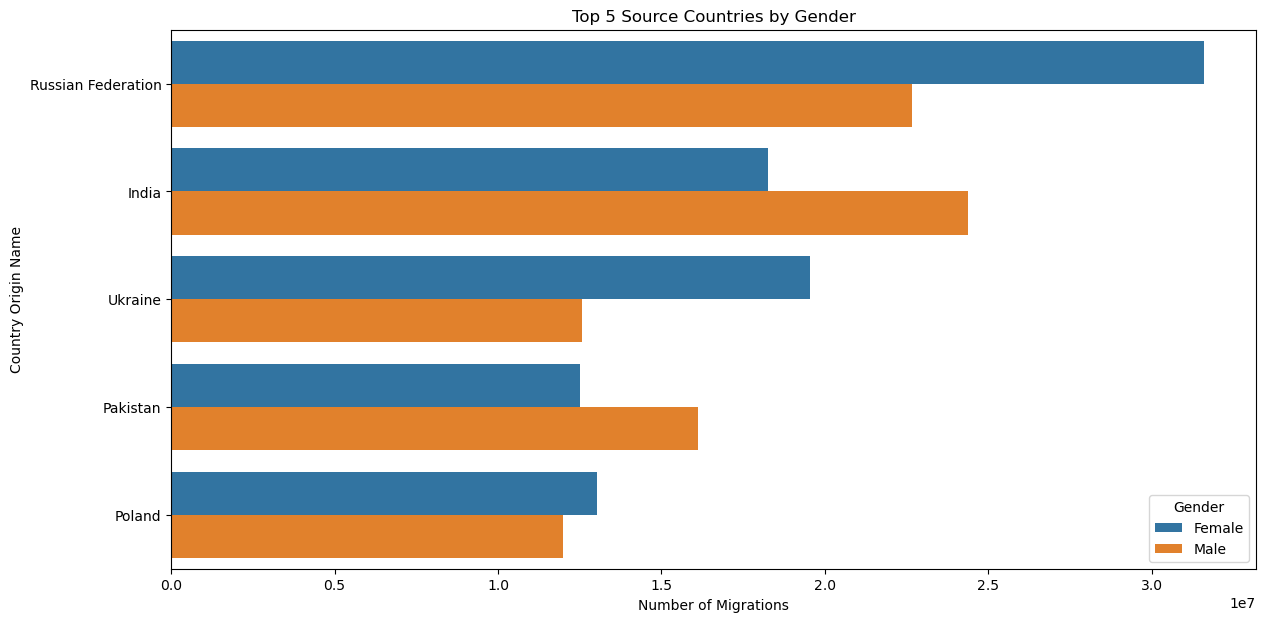

/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

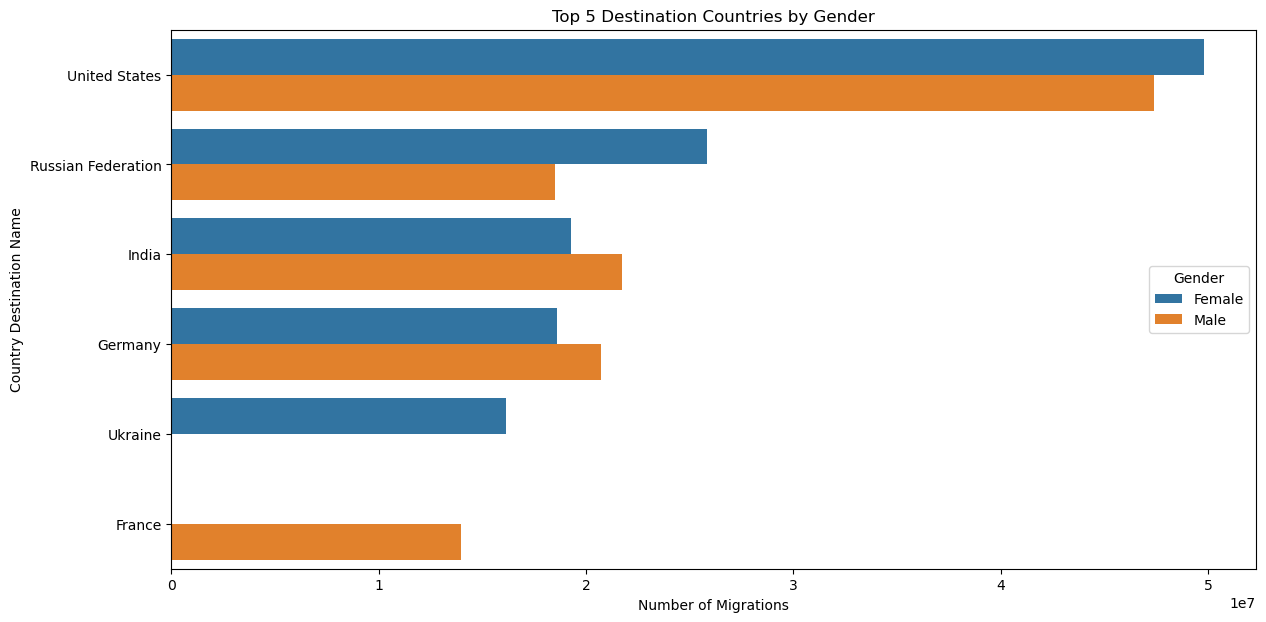

In [57]:
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name', 'Migration by Gender Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Filter out the 'Total' category from the gender data
filtered_df = long_df[long_df['Migration by Gender Name'].isin(['Male', 'Female'])]

# Get the top 5 source countries by gender without 'Total'
top_5_source_country_gender_filtered = filtered_df.groupby(['Migration by Gender Name', 'Country Origin Name'])['Migration'].sum().reset_index()
top_5_source_country_gender_filtered = top_5_source_country_gender_filtered.sort_values(['Migration', 'Migration by Gender Name' ], ascending=[False, False]).groupby('Migration by Gender Name').head(5)

# Get the top 5 destination countries by gender without 'Total'
top_5_destination_country_gender_filtered = filtered_df.groupby(['Migration by Gender Name', 'Country Dest Name'])['Migration'].sum().reset_index()
top_5_destination_country_gender_filtered = top_5_destination_country_gender_filtered.sort_values([ 'Migration', 'Migration by Gender Name'], ascending=[False, False]).groupby('Migration by Gender Name').head(5)

# Plotting the top 5 source countries by gender
plt.figure(figsize=(14, 7))
sns.barplot(x='Migration', y='Country Origin Name', hue='Migration by Gender Name', data=top_5_source_country_gender_filtered)
plt.title('Top 5 Source Countries by Gender')
plt.xlabel('Number of Migrations')
plt.ylabel('Country Origin Name')
plt.legend(title='Gender')
plt.show()

# Plotting the top 5 destination countries by gender
plt.figure(figsize=(14, 7))
sns.barplot(x='Migration', y='Country Dest Name', hue='Migration by Gender Name', data=top_5_destination_country_gender_filtered)
plt.title('Top 5 Destination Countries by Gender')
plt.xlabel('Number of Migrations')
plt.ylabel('Country Destination Name')
plt.legend(title='Gender')
plt.show()

In [58]:
top_5_destination_country_gender_filtered

,Migration by Gender Name,Country Dest Name,Migration
218,Female,United States,49821961
449,Male,United States,47406879
170,Female,Russian Federation,25859281
322,Male,India,21720384
305,Male,Germany,20727679
91,Female,India,19278488
74,Female,Germany,18586825
401,Male,Russian Federation,18490122
215,Female,Ukraine,16123288
299,Male,France,13955384


/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

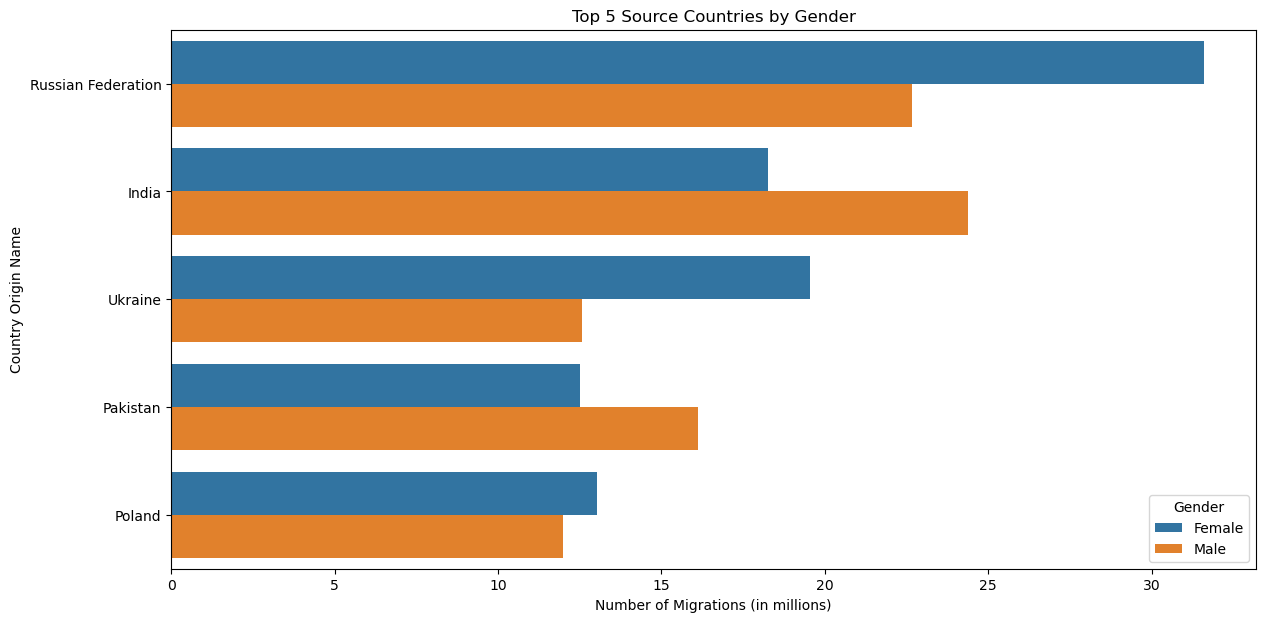

/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

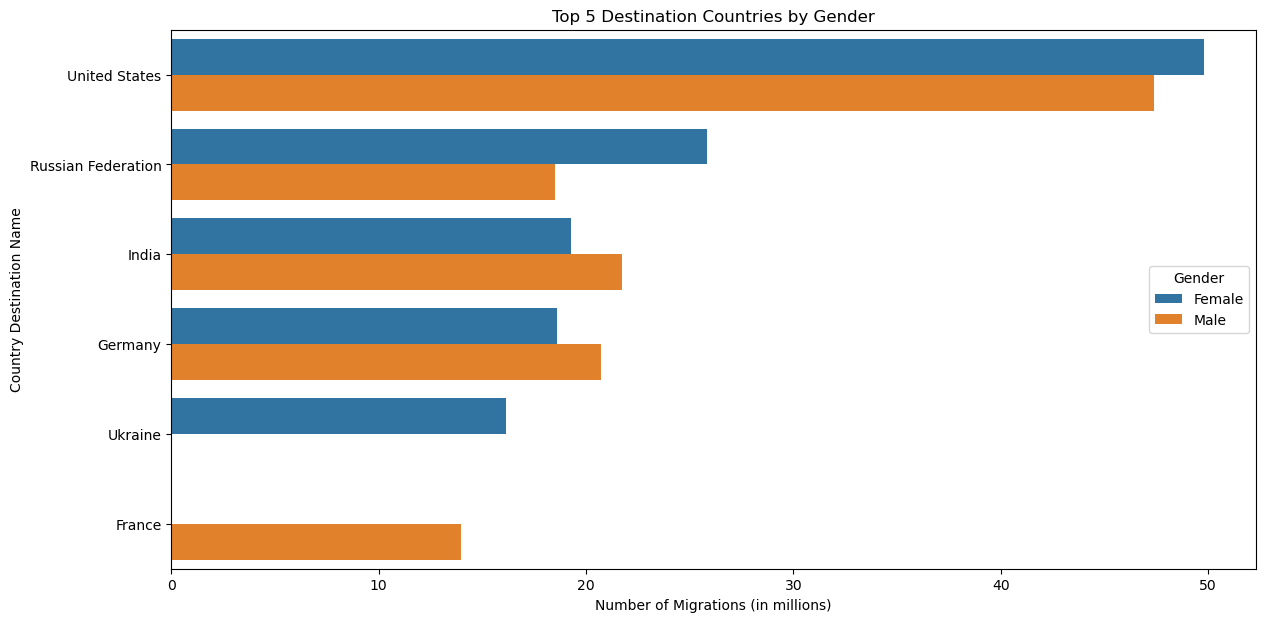

In [60]:
top_5_source_country_gender_filtered = filtered_df.groupby(['Migration by Gender Name', 'Country Origin Name'])['Migration'].sum().reset_index()
top_5_source_country_gender_filtered = top_5_source_country_gender_filtered.sort_values(['Migration', 'Migration by Gender Name'], ascending=[False, False]).groupby('Migration by Gender Name').head(5)

# Get the top 5 destination countries by gender without 'Total'
top_5_destination_country_gender_filtered = filtered_df.groupby(['Migration by Gender Name', 'Country Dest Name'])['Migration'].sum().reset_index()
top_5_destination_country_gender_filtered = top_5_destination_country_gender_filtered.sort_values(['Migration', 'Migration by Gender Name'], ascending=[False, False]).groupby('Migration by Gender Name').head(5)

# Convert migration numbers to millions for better readability
top_5_source_country_gender_filtered['Migration'] = top_5_source_country_gender_filtered['Migration'] / 1e6
top_5_destination_country_gender_filtered['Migration'] = top_5_destination_country_gender_filtered['Migration'] / 1e6

# Plotting the top 5 source countries by gender with migration numbers in millions
plt.figure(figsize=(14, 7))
sns.barplot(x='Migration', y='Country Origin Name', hue='Migration by Gender Name', data=top_5_source_country_gender_filtered)
plt.title('Top 5 Source Countries by Gender')
plt.xlabel('Number of Migrations (in millions)')
plt.ylabel('Country Origin Name')
plt.legend(title='Gender')
plt.show()

# Plotting the top 5 destination countries by gender with migration numbers in millions
plt.figure(figsize=(14, 7))
sns.barplot(x='Migration', y='Country Dest Name', hue='Migration by Gender Name', data=top_5_destination_country_gender_filtered)
plt.title('Top 5 Destination Countries by Gender')
plt.xlabel('Number of Migrations (in millions)')
plt.ylabel('Country Destination Name')
plt.legend(title='Gender')
plt.show()

/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


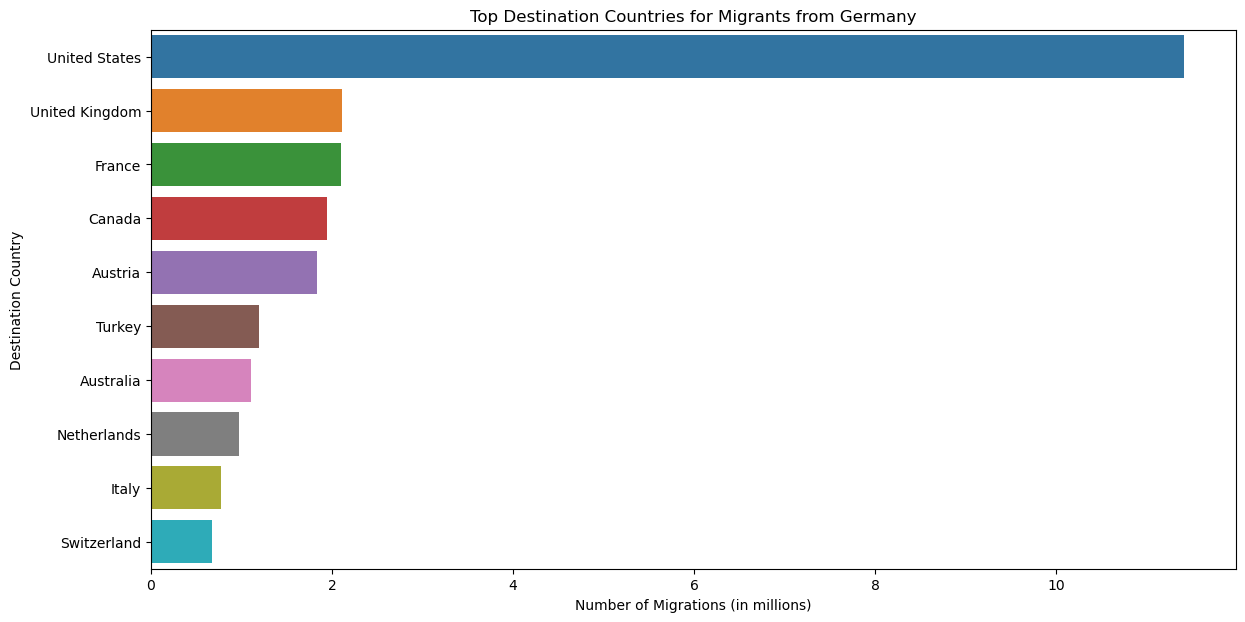

In [61]:
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name', 'Migration by Gender Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Filter the dataset for source country Germany
germany_destinations = long_df[long_df['Country Origin Name'] == 'Germany']

# Aggregate migration data for Germany as the source country
top_destinations_from_germany = germany_destinations.groupby('Country Dest Name')['Migration'].sum().reset_index()
top_destinations_from_germany = top_destinations_from_germany.sort_values(by='Migration', ascending=False).head(10)

# Convert migration numbers to millions for better readability
top_destinations_from_germany['Migration'] = top_destinations_from_germany['Migration'] / 1e6

# Plotting the top destination countries for migrants from Germany
plt.figure(figsize=(14, 7))
sns.barplot(x='Migration', y='Country Dest Name', data=top_destinations_from_germany)
plt.title('Top Destination Countries for Migrants from Germany')
plt.xlabel('Number of Migrations (in millions)')
plt.ylabel('Destination Country')
plt.show()

/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


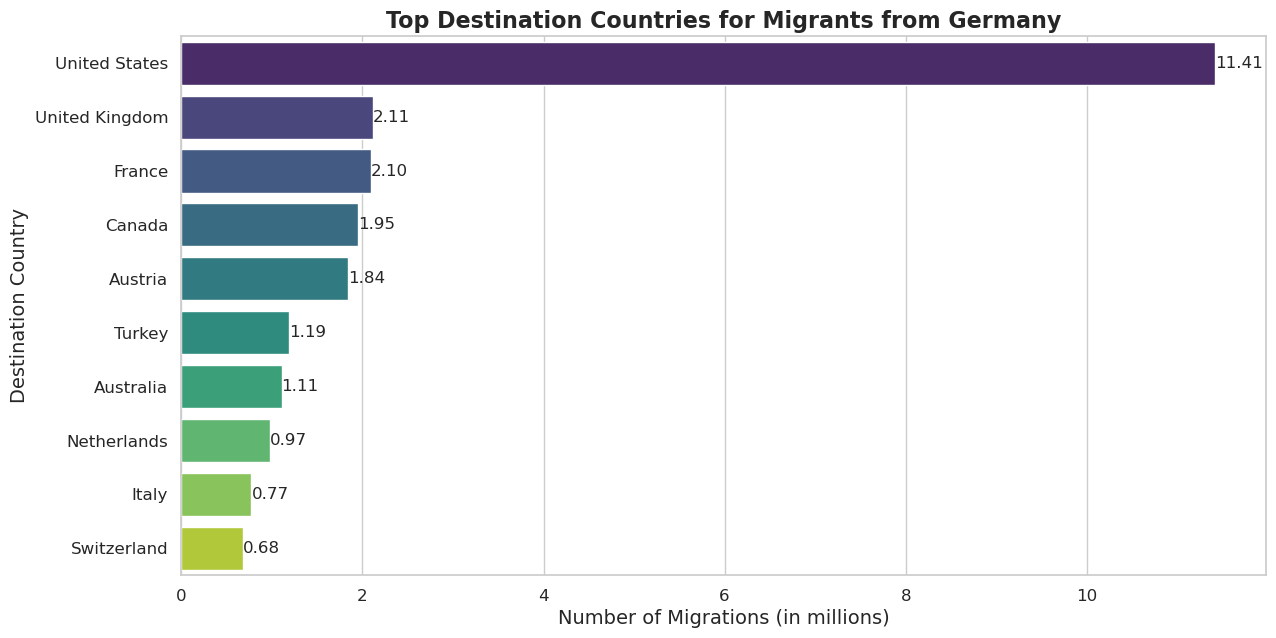

In [62]:
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name', 'Migration by Gender Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Filtering the dataset for source country Germany
germany_destinations = long_df[long_df['Country Origin Name'] == 'Germany']

# Aggregating migration data for Germany as the source country
top_destinations_from_germany = germany_destinations.groupby('Country Dest Name')['Migration'].sum().reset_index()
top_destinations_from_germany = top_destinations_from_germany.sort_values(by='Migration', ascending=False).head(10)

# Converting migration numbers to millions for better readability
top_destinations_from_germany['Migration'] = top_destinations_from_germany['Migration'] / 1e6

# Plotting the top destination countries for migrants from Germany
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
barplot = sns.barplot(x='Migration', y='Country Dest Name', data=top_destinations_from_germany, palette='viridis')

# Customizing the plot to make it more readable and aesthetically pleasing
plt.title('Top Destination Countries for Migrants from Germany', fontsize=16, weight='bold')
plt.xlabel('Number of Migrations (in millions)', fontsize=14)
plt.ylabel('Destination Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12)

plt.show()

/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/IAIS/rrao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


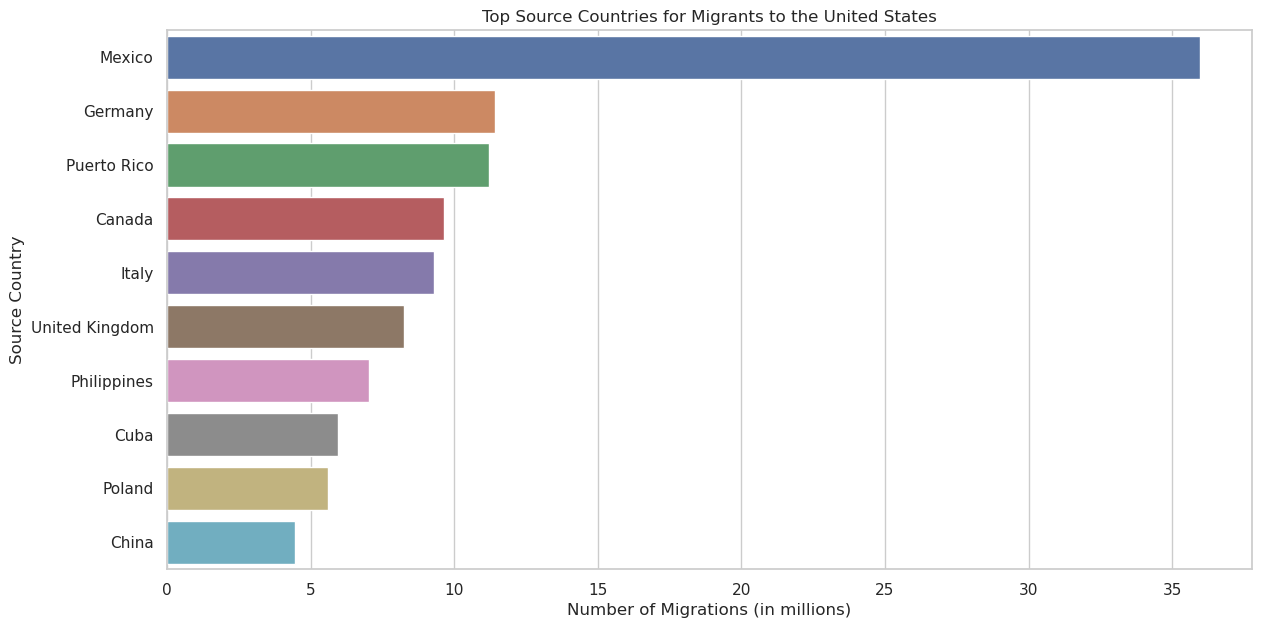

In [63]:
long_df = df.melt(id_vars=['Country Origin Name', 'Country Dest Name', 'Migration by Gender Name'], 
                  value_vars=['1960', '1970', '1980', '1990', '2000'], 
                  var_name='Decade', 
                  value_name='Migration')

# Filter the dataset for destination country United States
us_sources = long_df[long_df['Country Dest Name'] == 'United States']

# Aggregate migration data for the United States as the destination country
top_sources_to_us = us_sources.groupby('Country Origin Name')['Migration'].sum().reset_index()
top_sources_to_us = top_sources_to_us.sort_values(by='Migration', ascending=False).head(10)

# Convert migration numbers to millions for better readability
top_sources_to_us['Migration'] = top_sources_to_us['Migration'] / 1e6

# Plotting the top source countries for migrants to the United States
plt.figure(figsize=(14, 7))
sns.barplot(x='Migration', y='Country Origin Name', data=top_sources_to_us)
plt.title('Top Source Countries for Migrants to the United States')
plt.xlabel('Number of Migrations (in millions)')
plt.ylabel('Source Country')
plt.show()